<a href="https://colab.research.google.com/github/Meta-Sean/sqzme/blob/main/Short_Sales_Daily_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Lets see if we can download the daily volume reports from the web
# try FINRA first
import requests
import pandas as pd

def finra_data_download(facilities, dates):
  """
  function to download FINRA short sell volume data from
  different trading facilities.

  Parameters:
  facility - list of (str) identifier of trading facility you want to get data from
  dates - list of (str) dates you want to grab data from  

  Returns:
  Downloaded text files
  """
  for facility in facilities:
    for date in dates:
      url = f"https://cdn.finra.org/equity/regsho/daily/{facility}shvol{date}.txt"
      r = requests.get(url)
      with open(f'{facility}shvol{date}.txt', 'wb') as f:
        f.write(r.content)


# set-up
facilities = ['FNQC','FNSQ', 'FNYX']
dates = ['20220803', '20220804', '20220805', '20220808', '20220809'] 
# call function and check downloads
#finra_data_download(facilities, dates)

def create_filelist(facilities, dates):
  """
  helper function to create file list
  """
  file_arr = []
  for facility in facilities:
    for date in dates:
      file_arr.append(f"{facility}shvol{date}.txt")
  return file_arr

# Call helper files function to get list of files
files = create_filelist(facilities, dates)

def finra_dataframe(files):
  """
  Takes FINRA short sell volume data and
  combines the list of files passed in and creates a pandas DateFrame

  Parameters:
  files: list of files 
  """
  df = pd.DataFrame()
  for file in files:
    temp = pd.read_csv(file, sep="|")
    df = df.append(temp)
  return df

FINRA_df = finra_dataframe(files)

In [43]:
FINRA_df

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
0,20220803,A,275.0,0.0,343.0,B
1,20220803,AA,1679.0,0.0,3237.0,B
2,20220803,AADI,42.0,0.0,50.0,B
3,20220803,AAL,16824.0,0.0,33669.0,B
4,20220803,AAMC,166.0,0.0,166.0,B
...,...,...,...,...,...,...
7650,20220809,ZY,12027.0,437.0,26622.0,N
7651,20220809,ZYME,16764.0,4.0,19902.0,N
7652,20220809,ZYNE,18896.0,3983.0,40051.0,N
7653,20220809,ZYXI,7555.0,0.0,14803.0,N


In [44]:
# Turn Dates column into human read-able datetime types
FINRA_df = FINRA_df.dropna()
FINRA_df['Date'] = pd.to_datetime(FINRA_df["Date"], format='%Y%m%d')
FINRA_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
0,2022-08-03,A,275.0,0.0,343.0,B
1,2022-08-03,AA,1679.0,0.0,3237.0,B
2,2022-08-03,AADI,42.0,0.0,50.0,B
3,2022-08-03,AAL,16824.0,0.0,33669.0,B
4,2022-08-03,AAMC,166.0,0.0,166.0,B
...,...,...,...,...,...,...
7649,2022-08-09,ZWS,461.0,0.0,2794.0,N
7650,2022-08-09,ZY,12027.0,437.0,26622.0,N
7651,2022-08-09,ZYME,16764.0,4.0,19902.0,N
7652,2022-08-09,ZYNE,18896.0,3983.0,40051.0,N


In [45]:
# Take a user ticker and output the relevant row 
ticker = input("What ticker should we look up? ")

#edgx_ticker_indexes = (EDGX_df.index[EDGX_df['Symbol']==ticker].tolist())
finra_ticker_indexes = (FINRA_df.index[FINRA_df['Symbol']==ticker].tolist())


What ticker should we look up? SIGA


In [47]:
finra_ticker_indexes

[2907,
 2736,
 2718,
 2869,
 2604,
 7954,
 7923,
 7899,
 7972,
 7889,
 6220,
 6248,
 6253,
 6337,
 6106]

In [51]:
finra_dict = {}
for index in finra_ticker_indexes:
  finra_dict['Date'] = FINRA_df['Date'][finra_ticker_indexes]
  #FINRA_df['Symbol'][finra_ticker_indexes]
  finra_dict['ShortVolume'] = FINRA_df['ShortVolume'][finra_ticker_indexes]
  #FINRA_df['ShortExemptVolume'][finra_ticker_indexes]
  finra_dict['TotalVolume'] = FINRA_df['TotalVolume'][finra_ticker_indexes]
  #FINRA_df['Market'][finra_ticker_indexes]

finra_dict
# edgx_dict = {}
# for index in edgx_ticker_indexes:
#   edgx_dict['Date'] = EDGX_df['Date'][edgx_ticker_indexes]
#   #FINRA_df['Symbol'][finra_ticker_indexes]
#   edgx_dict['Short Volume'] = EDGX_df['Short Volume'][edgx_ticker_indexes]
#   #FINRA_df['ShortExemptVolume'][finra_ticker_indexes]
#   edgx_dict['Total Volume'] = EDGX_df['Total Volume'][edgx_ticker_indexes]
#   #FINRA_df['Market'][finra_ticker_indexes]

# edgx_dict

{'Date': 2907   2022-08-03
 2907   2022-08-04
 2907   2022-08-05
 2907   2022-08-08
 2907   2022-08-09
           ...    
 6106   2022-08-03
 6106   2022-08-04
 6106   2022-08-05
 6106   2022-08-08
 6106   2022-08-09
 Name: Date, Length: 153, dtype: datetime64[ns],
 'ShortVolume': 2907      23470.0
 2907       1920.0
 2907       2816.0
 2907      27836.0
 2907         10.0
           ...    
 6106        134.0
 6106          5.0
 6106       7181.0
 6106      25788.0
 6106    1083128.0
 Name: ShortVolume, Length: 153, dtype: float64,
 'TotalVolume': 2907      44074.0
 2907       3020.0
 2907       3509.0
 2907      54936.0
 2907        687.0
           ...    
 6106        601.0
 6106       5352.0
 6106      16520.0
 6106      55603.0
 6106    2730599.0
 Name: TotalVolume, Length: 153, dtype: float64}

In [52]:
FINRA_ticker_df = pd.DataFrame(finra_dict)
FINRA_ticker_df = FINRA_ticker_df.set_index('Date')

# EDGX_ticker_df = pd.DataFrame(edgx_dict)
# EDGX_ticker_df = EDGX_ticker_df.set_index('Date')

In [53]:
FINRA_ticker_df


,ShortVolume,TotalVolume
Date,,
2022-08-03,23470.0,44074.0
2022-08-04,1920.0,3020.0
2022-08-05,2816.0,3509.0
2022-08-08,27836.0,54936.0
2022-08-09,10.0,687.0
...,...,...
2022-08-03,134.0,601.0
2022-08-04,5.0,5352.0
2022-08-05,7181.0,16520.0


In [55]:
short_volume = FINRA_ticker_df.groupby(['Date']).ShortVolume.sum()
total_volume = FINRA_ticker_df.groupby(['Date']).TotalVolume.sum()

In [60]:
short_volume_df = pd.DataFrame(short_volume)
total_volume_df = pd.DataFrame(total_volume)
merged_df = pd.merge(short_volume_df, total_volume_df, how='outer', on='Date')
merged_df

,ShortVolume,TotalVolume
Date,,
2022-08-03,4507453.0,8283724.0
2022-08-04,11325861.0,20153626.0
2022-08-05,10897206.0,21820918.0
2022-08-08,5010858.0,10295617.0
2022-08-09,6694870.0,12636180.0


In [61]:
#EDGX_ticker_df.to_csv("EDGX-GOVX.csv")
merged_df.to_csv("FINRA-TRF-SIGA.csv")

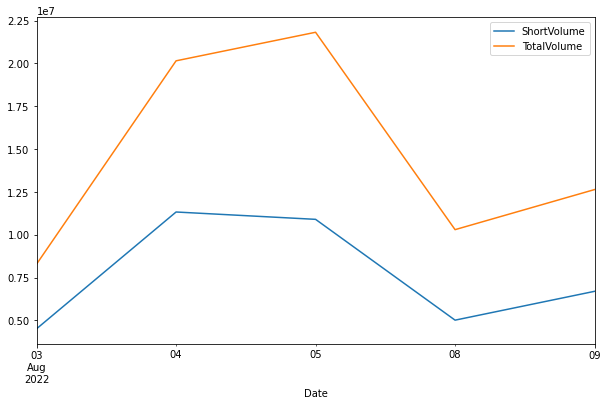

In [63]:
merged_df.plot.line(y=['ShortVolume', 'TotalVolume'], figsize=(10,6))
#EDGX_ticker_df.plot.line(y=['Short Volume', 'Total Volume'], figsize=(10,6))

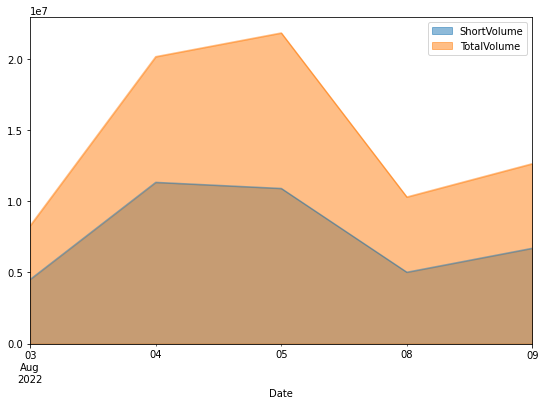

In [64]:
merged_df.plot(kind='area', stacked=False, figsize=(9,6))
#EDGX_ticker_df.plot(kind='area', stacked=False, figsize=(9,6))

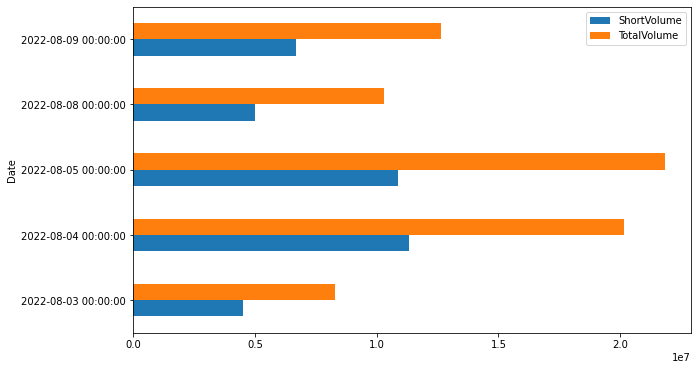

In [65]:
merged_df.plot(kind='barh', figsize=(10,6), ylabel='Volume')
#EDGX_ticker_df.plot(kind='barh', figsize=(10,6), ylabel='Volume')